<b> Malayka Iftikhar _ 015 <br> 
Insia Sharafat _010 <br>
Laiba Butt _ 014<br>
Data Science Semester Project </b>

# Happiness and Corruption dataset Analysis, EDA, Modeling 
This dataset is collected to find a relationship between freedom, happiness score, generosity and the CPI score.


### Importing Necessary Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from plotly import graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Loading data

#### About Dataset<br>
gdp_per_capita: The  GDP per capita, is a measure of a country's economic output that accounts for its number of people. <br>
dystopia_residual: The Dystopia Residual metric actually is the Dystopia Happiness Score, the Residual value for each country.<br>
cpi_score: The Corruption Perceptions Index (CPI) is an index which ranks countries by their perceived levels of public sector corruption.
<br>

In [3]:
data = pd.read_csv("E:\BSE\WorldHappiness_Corruption_2015_2020.csv")
data.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

### Cleaning Data

In [4]:
data.isnull().sum().head()  # to find missing values in dataset 
#Answer: No missing values 

Country            0
happiness_score    0
gdp_per_capita     0
family             0
health             0
dtype: int64

In [20]:
#sorting according country names
data.drop_duplicates(subset=['Country'], keep='last')
data.sort_values(['Country'])


Country  happiness_score  gdp_per_capita    family    health  \
395  Afghanistan           3.2030        0.350000  0.000000  0.361000   
657  Afghanistan           3.3600        0.382270  0.110370  0.173440   
519  Afghanistan           3.6320        0.332000  0.000000  0.255000   
259  Afghanistan           3.5750        0.319820  0.302850  0.303350   
120  Afghanistan           3.7940        0.401477  0.581543  0.180747   
..           ...              ...             ...       ...       ...   
229     Zimbabwe           4.6100        0.271000  1.032760  0.334750   
119     Zimbabwe           3.8750        0.375847  1.083096  0.196764   
639     Zimbabwe           4.1930        0.350410  0.714780  0.159500   
518     Zimbabwe           3.6920        0.357000  0.000000  0.248000   
790     Zimbabwe           3.2992        0.425564  0.000000  0.375038   

      freedom  generosity  government_trust  dystopia_residual continent  \
395  0.000000    0.158000          0.025000           0.000000      Asia   
657  0.164300    0.312680          0.071120           2.145580      Asia   
519  0.085000    0.191000          0.036000           0.000000      Asia   
259  0.234140    0.365100          0.097190           1.952100      Asia   
120  0.106180    0.311871          0.061158           2.150801      Asia   
..        ...         ...               ...                ...       ...   
229  0.258610    0.189870          0.080790           2.441910    Africa   
119  0.336384    0.189143          0.095375           1.597970    Africa   
639  0.254290    0.185030          0.085820           2.442700    Africa   
518  0.406000    0.132000          0.099000           0.000000    Africa   
790  0.377405    0.151349          0.080929           0.841031    Africa   

     Year  social_support  cpi_score  
395  2017        0.517000         15  
657  2019        0.000000         16  
519  2018        0.537000         16  
259  2016        0.000000         15  
120  2015        0.000000         11  
..    ...             ...        ...  
229  2016        0.000000         22  
119  2015        0.000000         21  
639  2019        0.000000         24  
518  2018        1.094000         22  
790  2020        1.047835         24  

[792 rows x 13 columns]

### Understanding Data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 395 to 790
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 86.6+ KB


In [22]:
data.shape

(792, 13)

In [23]:
data.describe()

happiness_score  gdp_per_capita      family      health     freedom  \
count       792.000000      792.000000  792.000000  792.000000  792.000000   
mean          5.473310        0.929217    0.504998    0.648691    0.427016   
std           1.124726        0.385774    0.552736    0.232261    0.148003   
min           2.566900        0.000000    0.000000    0.000000    0.000000   
25%           4.590750        0.644242    0.000000    0.510070    0.325433   
50%           5.485500        0.994544    0.000000    0.685397    0.439621   
75%           6.300500        1.228677    1.040410    0.815641    0.546280   
max           7.808700        2.096000    1.610574    1.141000    0.724000   

       generosity  government_trust  dystopia_residual         Year  \
count  792.000000        792.000000         792.000000   792.000000   
mean     0.212440          0.125720           1.379277  2017.500000   
std      0.121660          0.109032           1.075276     1.708904   
min      0.000000          0.000000           0.000000  2015.000000   
25%      0.125784          0.052862           0.000000  2016.000000   
50%      0.197000          0.089000           1.731948  2017.500000   
75%      0.273250          0.154250           2.236894  2019.000000   
max      0.838075          0.551910           3.602140  2020.000000   

       social_support   cpi_score  
count      792.000000  792.000000  
mean         0.609302   44.327020  
std          0.640754   19.508833  
min          0.000000   11.000000  
25%          0.000000   30.000000  
50%          0.176214   38.000000  
75%          1.268250   57.000000  
max          1.644000   91.000000

### EDA (Univariate and Multivariate Analysis)

In [8]:
print("Total COuntries = {}".format(data["Country"].nunique()))

Total COuntries = 132


<AxesSubplot:>

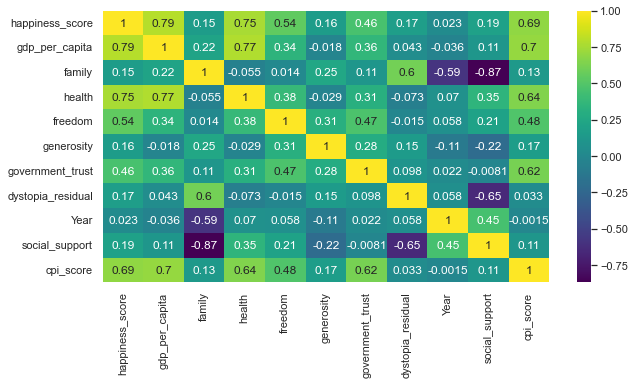

In [27]:
sns.set(rc = {'figure.figsize':(10,5)})            #heat map to see correlation
sns.heatmap(data.corr(), annot= True,  cmap='viridis')

<AxesSubplot:xlabel='cpi_score', ylabel='Country'>

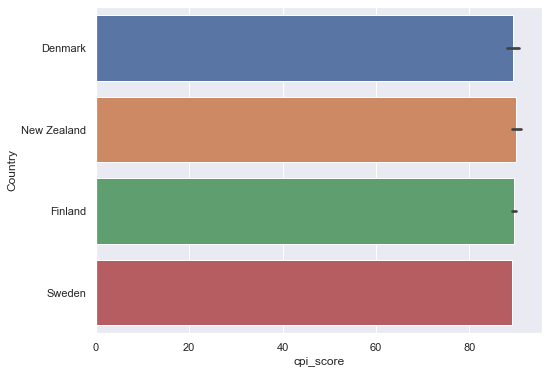

In [28]:
#Countries with height curroption rate
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(
    y='Country',
    x='cpi_score',
    data=data.nlargest(10, 'cpi_score')
)
#Ans: Denmark 

<AxesSubplot:xlabel='Country', ylabel='happiness_score'>

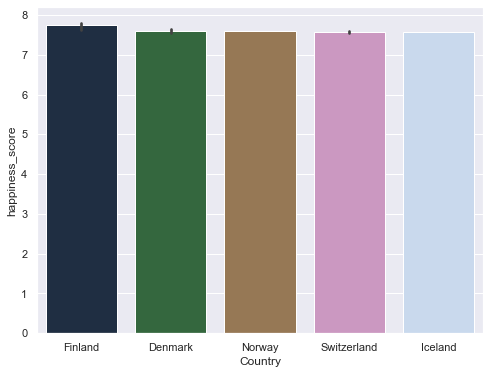

In [29]:
#the happiest country?
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(
    x='Country',
    y='happiness_score',
    data=data.nlargest(10, 'happiness_score'), palette='cubehelix'
)
#Ans: Finland

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

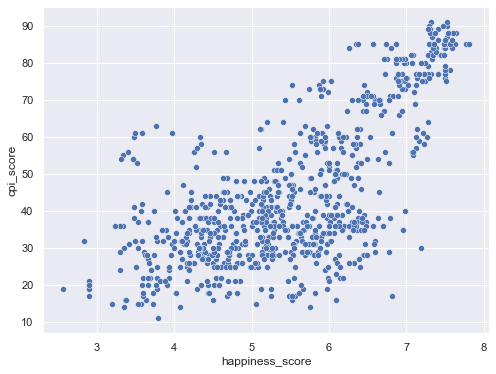

In [30]:
#Correlation b/w Happiness and corruption rate
sns.scatterplot(x="happiness_score", y = "cpi_score", data = data)

#Ans: There is a positive or direct relatinship 

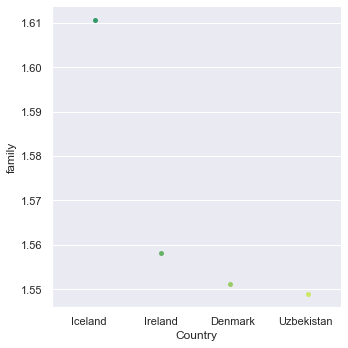

In [31]:
#Country that provides Family Care opportunities 
sns.set(rc = {'figure.figsize':(20,20)})
sns.catplot(x = "Country", y = "family", palette = "summer", data = data.nlargest(4, 'family'))

#Ans: Iceland 

<AxesSubplot:xlabel='family', ylabel='cpi_score'>

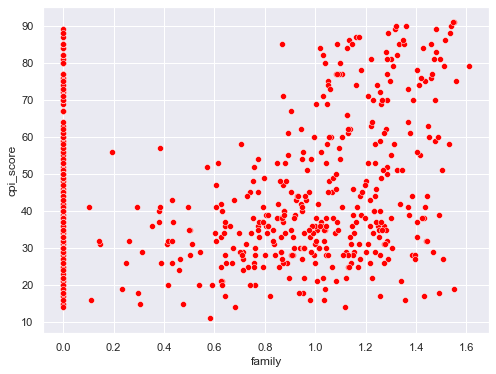

In [32]:
#relation between family care and corruption rate
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x="family", y = "cpi_score", data = data, color = "red")
#Ans: Direct relation, increase in one and the other

<AxesSubplot:xlabel='Country', ylabel='gdp_per_capita'>

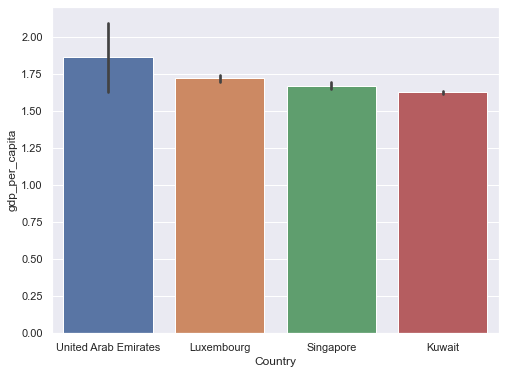

In [34]:
#Highest GDP 
sns.barplot(y= "gdp_per_capita", x = "Country", data = data.nlargest(8, 'gdp_per_capita'))

#Ans: United Arab Emrites has the highest GDP per Capita 

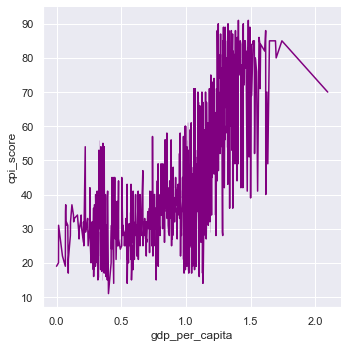

In [36]:
#relation b/w GPD and CPI 
sns.set(rc = {'figure.figsize':(30,10)})
sns.relplot(data=data, x="gdp_per_capita", y="cpi_score", kind="line", color = "Purple")

#Ans: Directly proprotional 

In [37]:
#heighest Health Care Rate 
fig = px.pie(data.nlargest(5, 'health'), values='health', names='Country', title='Countries With The Highest Health Rates', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#Ans: Singapore 

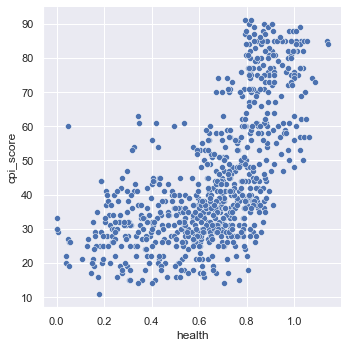

In [38]:
#Effect of healthccare on corruption rate 
sns.relplot(
    data=data,
    x="health", y="cpi_score",
    palette="ch:r=-.5,l=.75"
)

#Ans: direct relation 

In [39]:
fig = px.bar(data.nlargest(5, 'freedom'), x='Country', y='freedom', height=400)
fig.show()

<AxesSubplot:xlabel='Country', ylabel='gdp_per_capita'>

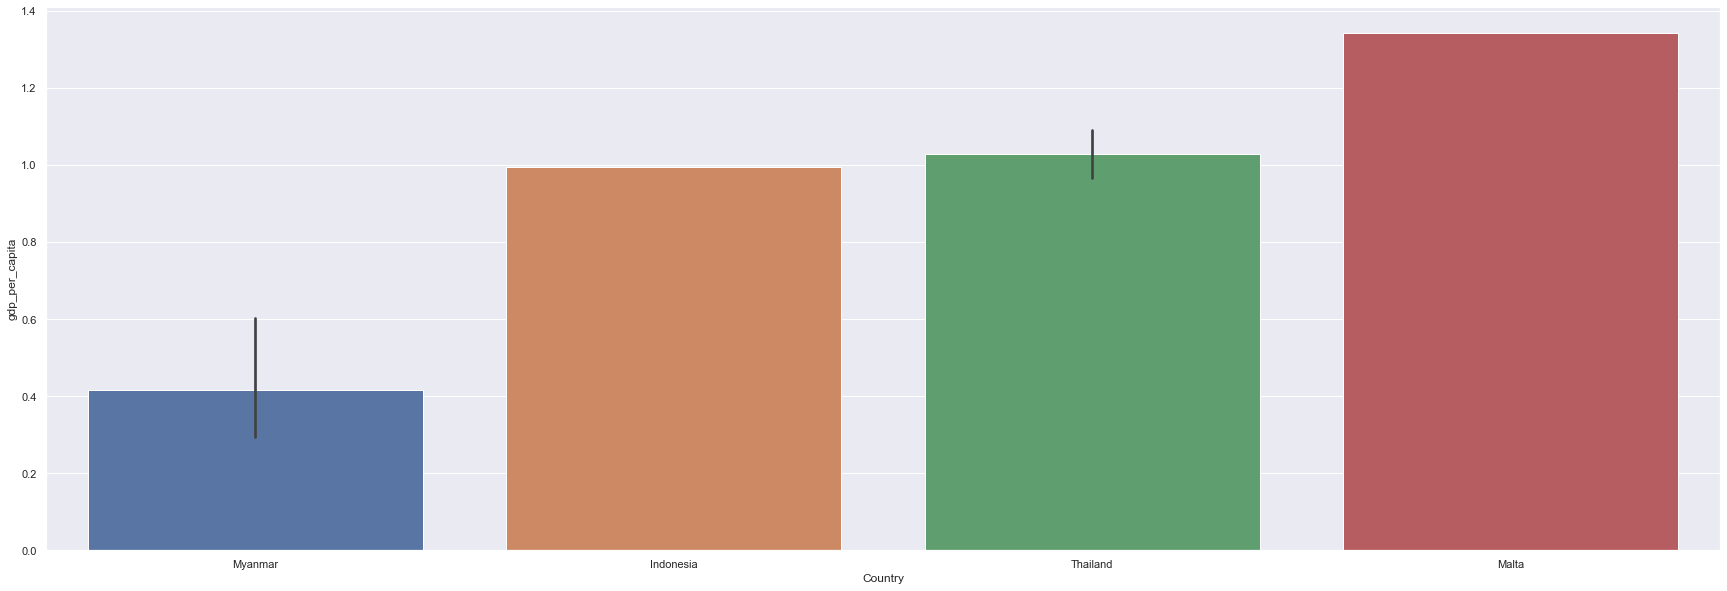

In [50]:
#Most generous state
sns.barplot(y= "gdp_per_capita", x = "Country", data = data.nlargest(8, 'generosity'))

#ans: malta

In [47]:
fig = px.scatter(data, x="generosity", y="cpi_score", color="continent", log_x=True, size_max=60)
fig.show()

## Outliers in the Data <br>
Scatter plots often have a pattern. We call a data point an outlier if it doesn't fit the pattern.

<AxesSubplot:xlabel='happiness_score', ylabel='cpi_score'>

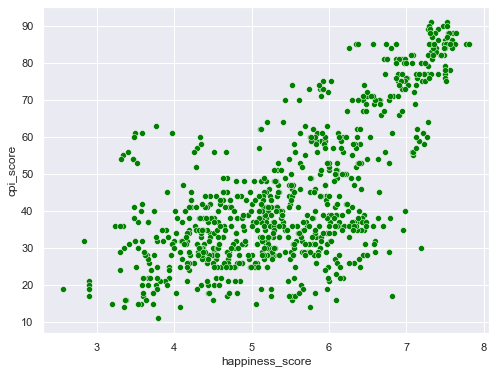

In [5]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "happiness_score", y = "cpi_score", data = data, color = "green")

In [7]:
data["generosity"].describe()

count    792.000000
mean       0.212440
std        0.121660
min        0.000000
25%        0.125784
50%        0.197000
75%        0.273250
max        0.838075
Name: generosity, dtype: float64

<AxesSubplot:xlabel='family', ylabel='cpi_score'>

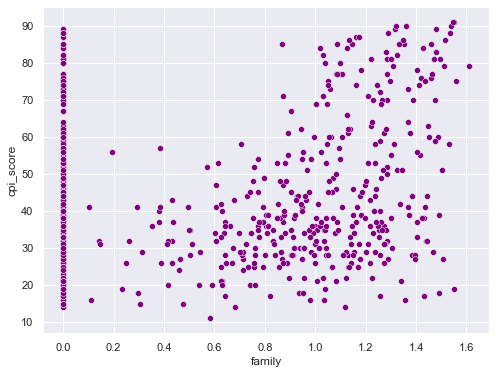

In [10]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "family", y = "cpi_score", data = data, color = "purple")

In [8]:
data["social_support"].describe()

count    792.000000
mean       0.609302
std        0.640754
min        0.000000
25%        0.000000
50%        0.176214
75%        1.268250
max        1.644000
Name: social_support, dtype: float64

<AxesSubplot:xlabel='social_support', ylabel='cpi_score'>

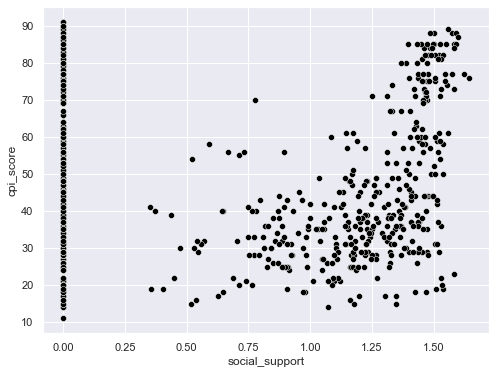

In [11]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "social_support", y = "cpi_score", data = data, color = "black")

<AxesSubplot:xlabel='social_support', ylabel='cpi_score'>

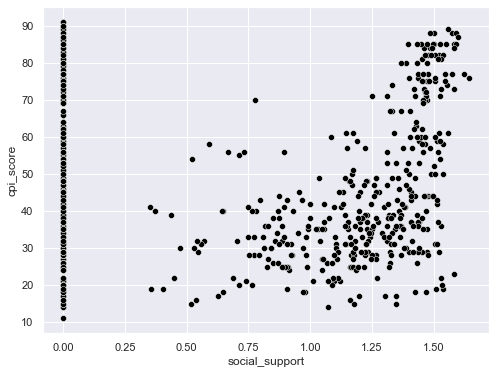

In [12]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(x = "social_support", y = "cpi_score", data = data, color = "black")

# All the points are following the pattern of Scatter plot so there are no outliers. The data is clean. 

In [20]:
def get_cpi_score(Country):        #Extra Answer
    mask = data['Country'] == Country
    return data[mask].shape[0]

In [21]:
get_cpi_score('Europe')

0

## Feature Engineering 

In [13]:
#Country Scaling 
Malayka_Country = LabelEncoder()
data["Country"] = Malayka_Country.fit_transform(data["Country"])
data.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       90            7.537        1.616463  1.533524  0.796667  0.635423   
1       30            7.522        1.482383  1.551122  0.792566  0.626007   
2       49            7.504        1.480633  1.610574  0.833552  0.627163   
3      112            7.494        1.564980  1.516912  0.858131  0.620071   
4       37            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [22]:
#Continent Encoding 
continento = LabelEncoder()
data["continent"] = continento.fit_transform(data["continent"])
data.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       90            7.537        1.616463  1.533524  0.796667  0.635423   
1       30            7.522        1.482383  1.551122  0.792566  0.626007   
2       49            7.504        1.480633  1.610574  0.833552  0.627163   
3      112            7.494        1.564980  1.516912  0.858131  0.620071   
4       37            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual  continent  Year  \
0    0.362012          0.315964           2.277027          3  2015   
1    0.355280          0.400770           2.313707          3  2015   
2    0.475540          0.153527           2.322715          3  2015   
3    0.290549          0.367007           2.276716          3  2015   
4    0.245483          0.382612           2.430182          3  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [24]:
data = data.drop(["Country", "continent", "Year"], axis = 1)
data.head()

happiness_score  gdp_per_capita    family    health   freedom  generosity  \
0            7.537        1.616463  1.533524  0.796667  0.635423    0.362012   
1            7.522        1.482383  1.551122  0.792566  0.626007    0.355280   
2            7.504        1.480633  1.610574  0.833552  0.627163    0.475540   
3            7.494        1.564980  1.516912  0.858131  0.620071    0.290549   
4            7.469        1.443572  1.540247  0.809158  0.617951    0.245483   

   government_trust  dystopia_residual  social_support  cpi_score  
0          0.315964           2.277027             0.0         88  
1          0.400770           2.313707             0.0         91  
2          0.153527           2.322715             0.0         79  
3          0.367007           2.276716             0.0         86  
4          0.382612           2.430182             0.0         90

# Model Building 

### Train Test Split

In [25]:
x = data.drop(['cpi_score'], axis= 1).values  
#drop cpi_score column from training data because that is the target variable that we want to predict using our model 
y = data["cpi_score"].values

In [26]:
x.shape

(792, 9)

In [27]:
y.shape  #we only have one column as dependent or target variable

(792,)

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.20, random_state =42,shuffle=True) #20% test data 

In [29]:
x_train.shape

(633, 9)

### Training

In [37]:
model = Sequential()

In [39]:
#input layer
model.add(Dense(150, input_shape = (9,), activation = 'relu')) #in train shape we have 9 column 

In [41]:
#hidden layers
model.add(Dense(100, activation = "linear"))
model.add(Dense(95, activation = "linear"))
model.add(Dense(90, activation = "linear"))
model.add(Dense(85, activation = "linear"))
model.add(Dense(80, activation = "linear"))
model.add(Dense(75, activation = "linear"))
model.add(Dense(70, activation = "linear"))
model.add(Dense(65, activation = "linear"))
model.add(Dense(60, activation = "linear"))
model.add(Dense(55, activation = "linear"))
model.add(Dense(50, activation = "linear"))
model.add(Dense(45, activation = "linear"))
model.add(Dense(40, activation = "linear"))
model.add(Dense(35, activation = "linear"))
model.add(Dense(30, activation = "linear"))
model.add(Dense(25, activation = "linear"))
model.add(Dense(20, activation = "linear"))
model.add(Dense(15, activation = "linear"))
model.add(Dense(10, activation = "linear"))
model.add(Dense(5, activation = "linear"))

In [43]:
#output layer
model.add(Dense(1))

In [57]:
#optimizer and loss funct
model.compile(optimizer = "Adam", loss = "mse", metrics="mae")  #we used MSE bcz this is regression problem 

In [59]:
#training

model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 100, epochs = 80)

Epoch 1/80
7/7 [==============================] - 0s 43ms/step - loss: 77.8656 - mae: 6.9202 - val_loss: 84.6057 - val_mae: 7.4814
Epoch 2/80
7/7 [==============================] - 0s 29ms/step - loss: 61.9859 - mae: 6.0949 - val_loss: 86.3431 - val_mae: 7.6217
Epoch 3/80
7/7 [==============================] - 0s 26ms/step - loss: 59.4526 - mae: 5.9610 - val_loss: 88.4333 - val_mae: 7.3047
Epoch 4/80
7/7 [==============================] - 0s 25ms/step - loss: 55.9433 - mae: 5.6956 - val_loss: 97.7907 - val_mae: 7.5938
Epoch 5/80
7/7 [==============================] - 0s 27ms/step - loss: 57.9376 - mae: 5.7782 - val_loss: 97.7293 - val_mae: 7.6094
Epoch 6/80
7/7 [==============================] - 0s 34ms/step - loss: 58.0639 - mae: 5.8954 - val_loss: 91.4090 - val_mae: 7.3864
Epoch 7/80
7/7 [==============================] - 0s 27ms/step - loss: 55.7976 - mae: 5.7068 - val_loss: 85.0820 - val_mae: 7.4750
Epoch 8/80
7/7 [==============================] - 0s 29ms/step - loss: 58.4424 - ma

In [61]:
#testing
model_pred = model.predict(x_test)

5/5 [==============================] - 1s 12ms/step


In [67]:
#Model Loss
mae = mean_absolute_error(y_test, model_pred)
mae

7.821244845600249

In [63]:
#mean squared error
mse4 = mean_squared_error(y_test, model_pred)
mse4

103.89995478275583

### Visualization of actual and predicted value

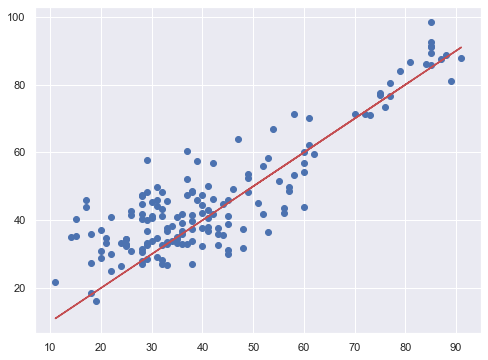

In [65]:
plt.scatter(y_test, model_pred)
plt.plot(y_test, y_test, "r")

In [66]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 13ms/step - loss: 103.8999 - mae: 7.8212


[103.89994812011719, 7.821245193481445]